In [3]:
import pandas as pd
"""load the testing and training data set using pandas"""
testing_data = pd.read_csv('C:/Users/Arbaaz/Desktop/Data Classification CW/testingSet-1.csv')
                           
training_data = pd.read_csv('C:/Users/Arbaaz/Desktop/Data Classification CW/trainingSet-1.csv')

In [4]:
testing_data

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,1,5,0,1,3,2,1,18,30,50,13,12,24,1
1,0,1,0,0,1,1,1,10,10,12,10,6,16,-1
2,0,7,0,0,4,4,1,21,30,46,19,11,25,1
3,0,1,0,0,1,1,1,2,4,3,4,2,5,-1
4,0,1,0,0,1,1,1,4,4,7,3,6,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,0,0,2,2,1,9,11,16,5,8,11,-1
96,0,1,0,0,1,1,1,5,7,13,7,8,7,1
97,0,1,0,0,1,1,1,6,9,15,7,7,11,1
98,0,1,0,0,1,1,1,5,4,11,4,4,7,1


In [5]:
training_data

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,8,9,0,9,5,5,3,33,31,57,15,12,52,-1
396,2,7,0,0,4,4,3,33,44,80,21,13,38,-1
397,0,1,0,0,1,1,1,3,3,3,3,3,5,-1
398,1,1,0,0,1,1,1,5,5,7,4,4,7,-1


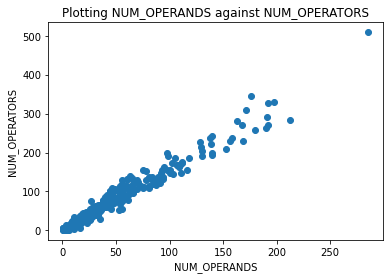

In [6]:
import matplotlib.pyplot as plt
import numpy as np
#plot comparing NUM_OPERANDS to NUM_OPERATORS
fig = plt.figure()
plt.title("Plotting NUM_OPERANDS against NUM_OPERATORS")
plt.xlabel("NUM_OPERANDS")
plt.ylabel("NUM_OPERATORS")
plt.scatter(training_data.iloc[:, 8],training_data.iloc[:, 9],marker = 'o')
plt.show()

In [7]:
"""Splitting data"""
train_inputs = training_data.iloc[:, 0:13]
train_labels = training_data.iloc[:,13]

test_inputs = testing_data.iloc[:, 0:13]
test_labels = testing_data.iloc[:,13]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#StandardScaler using parameters frpm the training data
scaler = preprocessing.StandardScaler().fit(train_inputs)
#Normalising the data
scaled_data_training = scaler.transform(train_inputs)
scaled_data_test = scaler.transform(test_inputs)

In [9]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
train = pca.fit_transform(scaled_data_training)

In [10]:
pca.explained_variance_

array([9.62022196e+00, 1.01743247e+00, 8.77802044e-01, 5.30464425e-01,
       4.24033994e-01, 2.33567446e-01, 1.80840247e-01, 6.63390402e-02,
       3.91313540e-02, 2.88607814e-02, 1.09915563e-02, 1.91247185e-03,
       9.83665542e-04])

In [11]:
pca.explained_variance_ratio_

array([7.38167031e-01, 7.80683757e-02, 6.73544261e-02, 4.07029434e-02,
       3.25364546e-02, 1.79218098e-02, 1.38760113e-02, 5.09024559e-03,
       3.00257890e-03, 2.21450996e-03, 8.43390568e-04, 1.46745436e-04,
       7.54774137e-05])

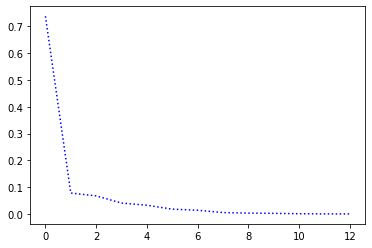

In [12]:
plt.plot(pca.explained_variance_ratio_, color='blue', linestyle='dotted')

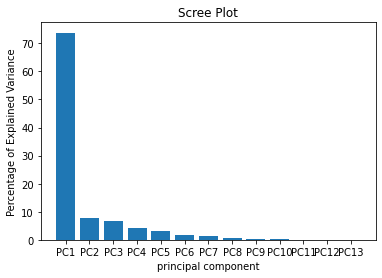

In [13]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
labels = ['PC' + str(n) for n in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

In [14]:
test = pca.fit_transform(scaled_data_test)

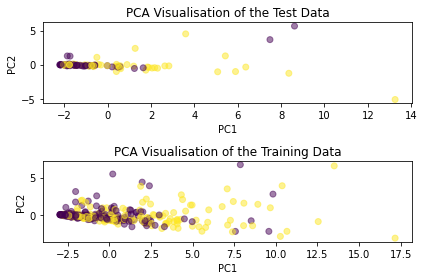

In [15]:
plt.subplot(211)
plt.title("PCA Visualisation of the Test Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(test[:, 0],test[:, 1],c=test_labels, marker = 'o',alpha = 0.5)
plt.subplot(212)
plt.title("PCA Visualisation of the Training Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(train[:, 0],train[:, 1],c=train_labels, marker = 'o', alpha =0.5)
plt.tight_layout()
plt.show()

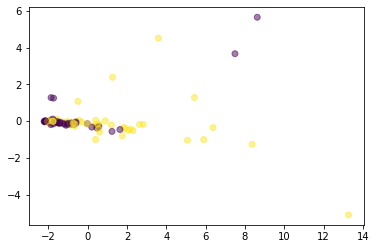

In [16]:
plt.scatter(test[:, 0],test[:, 1],c=test_labels, marker = 'o',alpha = 0.5)

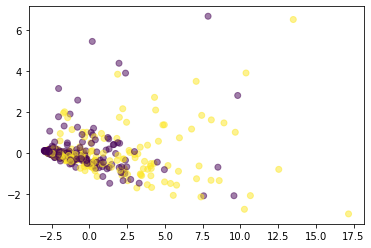

In [17]:
plt.scatter(train[:, 0],train[:, 1],c=train_labels, marker = 'o', alpha =0.5)

In [18]:
"""Task 2"""
from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(train_inputs,train_labels, test_size=0.3, random_state=42)

SXtrain, Xvalid, Sytrain, vtest = train_test_split(train_inputs, train_labels, test_size=0.30,random_state=42)

In [19]:
len(SXtrain)

280

In [20]:
len(Xvalid)

120

In [21]:
scaler2 = preprocessing.StandardScaler().fit(SXtrain)
"""Scale the training set"""
scaled_trnX = scaler2.transform(SXtrain)
"""Scale the validation set"""
scaled_valX = scaler2.transform(Xvalid)

In [22]:
"""Task 3"""
from sklearn.svm import SVC
from sklearn import metrics
svc1 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=0.01)
model1 = svc1.fit(scaled_trnX, Sytrain)
vyfit1 = model1.predict(scaled_valX)
print('Accuracy:', metrics.accuracy_score(vtest, vyfit1))

Accuracy: 0.725


In [23]:
svc2 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)
model2 = svc2.fit(scaled_trnX, Sytrain)
vyfit2 = model2.predict(scaled_valX)
print('Accuracy:', metrics.accuracy_score(vtest, vyfit2))

Accuracy: 0.7083333333333334


In [24]:
svc3 = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=1)
model3 = svc3.fit(scaled_trnX, Sytrain)
vyfit3 = model3.predict(scaled_valX)
print('Accuracy:', metrics.accuracy_score(vtest, vyfit3))

Accuracy: 0.7083333333333334


In [25]:
svc4 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=0.01)
model4 = svc4.fit(scaled_trnX, Sytrain)
vyfit4 = model4.predict(scaled_valX)
print('Accuracy:', metrics.accuracy_score(vtest, vyfit4))

Accuracy: 0.7166666666666667


In [26]:
svc5 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=10)
model5 = svc5.fit(scaled_trnX, Sytrain)
vyfit5 = model5.predict(scaled_valX)
print('Accuracy:', metrics.accuracy_score(vtest, vyfit5))

Accuracy: 0.7083333333333334


In [27]:
svc6 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=1)
model6 = svc6.fit(scaled_trnX, Sytrain)
vyfit6 = model6.predict(scaled_valX)
print('Accuracy:', metrics.accuracy_score(vtest, vyfit6))

Accuracy: 0.6833333333333333


In [28]:
from sklearn.metrics import classification_report
print(classification_report(vtest, vyfit1,train_labels))

              precision    recall  f1-score   support

           1       0.93      0.45      0.60        56
          -1       0.67      0.97      0.79        64
           1       0.93      0.45      0.60        56
          -1       0.67      0.97      0.79        64
          -1       0.67      0.97      0.79        64
           1       0.93      0.45      0.60        56
          -1       0.67      0.97      0.79        64
           1       0.93      0.45      0.60        56
           1       0.93      0.45      0.60        56
          -1       0.67      0.97      0.79        64
           1       0.93      0.45      0.60        56
          -1       0.67      0.97      0.79        64
           1       0.93      0.45      0.60        56
          -1       0.67      0.97      0.79        64
          -1       0.67      0.97      0.79        64
          -1       0.67      0.97      0.79        64
           1       0.93      0.45      0.60        56
          -1       0.67    

C:\Users\Arbaaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=0      1
1     -1
2      1
3     -1
4     -1
      ..
395   -1
396   -1
397   -1
398   -1
399   -1
Name: DEFECTIVE, Length: 400, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [29]:
"""task 4"""
"""test the selected parameters on the test set"""
scaler = preprocessing.StandardScaler().fit(train_inputs)
scaled_X = scaler.transform(train_inputs)
scaled_tstX = scaler.transform(test_inputs)

In [30]:
"""Fit an SVM model with the most suitable parameters obtained
from previous previous code above."""
svc_final = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=0.01)
model_final = svc_final.fit(scaled_X, train_labels)
yfit_test = model_final.predict(scaled_tstX)
print('Accuracy:', metrics.accuracy_score(test_labels, yfit_test))

Accuracy: 0.57


In [31]:
test_labels.to_numpy()

array([ 1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1],
      dtype=int64)

In [32]:
yfit_test

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [33]:
len(test_labels)

100

In [34]:
len(test_labels)

100

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, yfit_test)

array([[42,  4],
       [39, 15]], dtype=int64)

In [36]:
"""function to find false positives, those that were actually
labeled as non-defective or -1,
 but are incorrectly predicted as defective or 1"""

def false_positives(actual_val, predicted_val):

    false_positives = 0

    for i in range(len(actual_val)):
        if actual_val[i] == -1 and predicted_val[i] == 1:
            false_positives +=1
    return false_positives

In [37]:
false_positives(test_labels, yfit_test)

4